<a href="https://colab.research.google.com/github/shahriar-tamjid/road-accident-data-analysis-of-dhaka-city/blob/main/Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **What is Time Series?**

Time Series is a set of observations on the values that a variable takes at different times. For example: Sales Trend, Stock Market Price, Weather Forecast etc. Time Series is using to predict the future values based on the previous observed value.

# **Component of Time Series**

* **Trend**: Tend may show the growth or decline in a time series over a long period. This is the type of tendency which continues to persist for a very long period. Prices and export and import data, for example, reflect obviously increasing tendencies over time.

* **Seasonality**: These are short term movements occurring in data due to seasonal factors. The short term is generally considered as a period in which changes occur in a time series with variations in weather or festivities

* **Irregularity**: These are sudden changes occurring in a time series which are unlikely to be repeated. They are components of a time series which cannot be explained by trends, seasonal or cyclic movements. These variations are sometimes called residual or random components.

* **Cyclic**: These are long term oscillations occurring in a time series. These oscillations are mostly observed in economics data and the periods of such oscillations are generally extended from five to twelve years or more. These oscillations are associated with the well known business cycles.

# **What is ARIMA model?**

ARIMA stands for Auto Regressive Integrated Moving Average. There are seasonal and Non-seasonal ARIMA models that can be used for forecasting An ARIMA model is characterized by 3 terms: p, d, q where p is the order of the AR term, q is the order of the MA term and d is the number of differencing required to make the time series stationary. If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA. More on that once we finish ARIMA.

# **Import Libraries and Setup Environment**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

**Import Dataset**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/GoogleColab2/Pre-Defense/Table2.xlsx')
df.head()

,Date,Total_Accident
0,01/01/2007,29
1,02/01/2007,42
2,03/01/2007,35
3,04/01/2007,1
4,05/01/2007,12


**Convert the Date column to Date type**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

<ipython-input-4-68239123ebe5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Total_Accident
0,2007-01-01,29
1,2007-02-01,42
2,2007-03-01,35
3,2007-04-01,1
4,2007-05-01,12


**Sorting the data by Date**

In [ ]:
df = df.sort_values(by=['Date'])
df.head()

,Date,Total_Accident
0,2007-01-01,29
31,2007-01-02,47
59,2007-01-03,32
90,2007-01-04,60
120,2007-01-05,80


**Set the Date for index**

In [ ]:
accident = df.set_index('Date')
accident.index

DatetimeIndex(['2007-01-01', '2007-01-02', '2007-01-03', '2007-01-04',
               '2007-01-05', '2007-01-06', '2007-01-07', '2007-01-08',
               '2007-01-09', '2007-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=5479, freq=None)

**Extract the Average Number of Accident in Each Month**

In [ ]:
y = accident['Total_Accident'].resample('MS').mean()
y.head()

Date
2007-01-01    51.354839
2007-02-01    45.500000
2007-03-01    46.903226
2007-04-01    52.266667
2007-05-01    49.419355
Freq: MS, Name: Total_Accident, dtype: float64

# **Visualize the Number of Accident in Each Year**

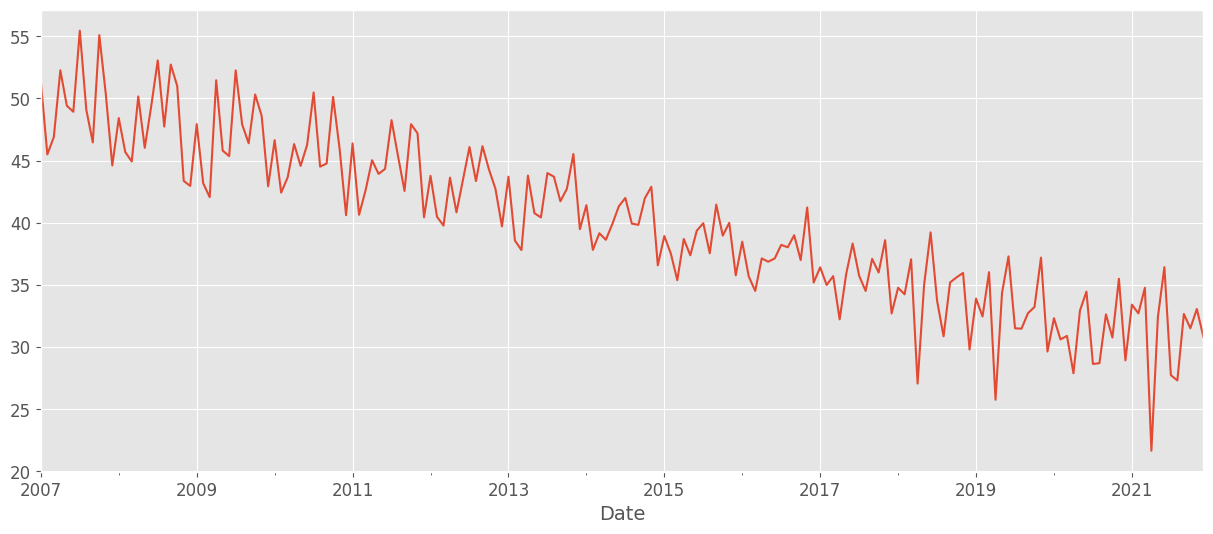

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

Visualize the data using **Time-Series Decomposition** that allows us to decompose our time series into three distinct components: **Trend**, **Seasonality**, and **Noise**.

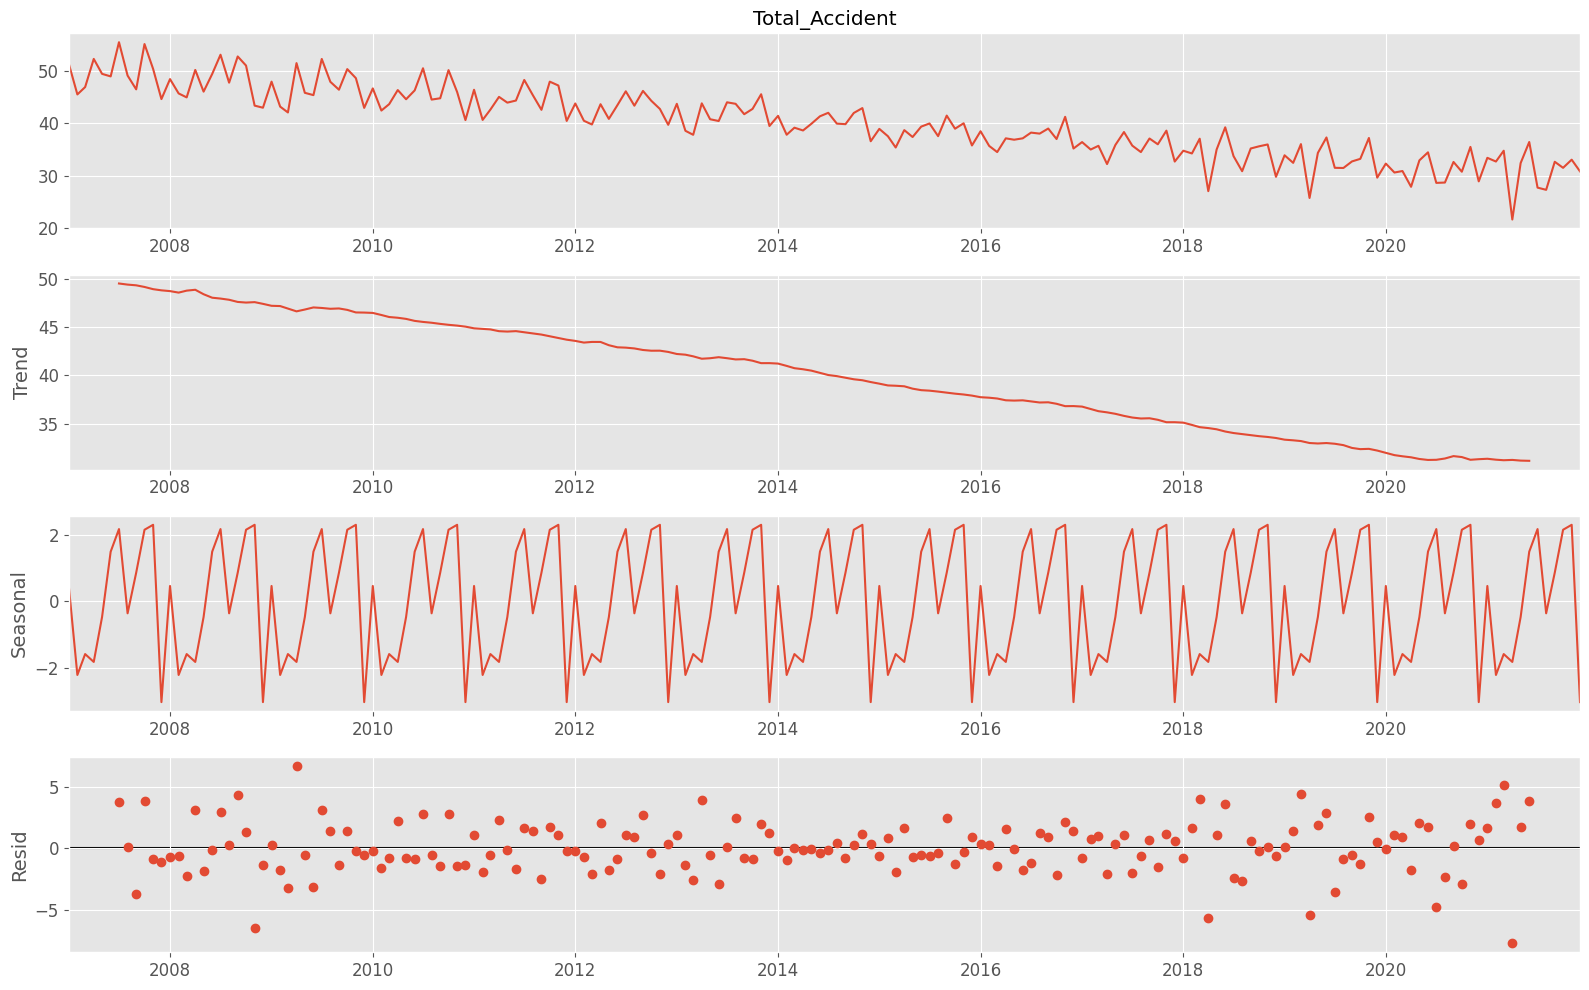

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# **Parameter Selection for ARIMA Time Series Model**

Our goal here is to use a **“Grid Search”** to find the optimal set of parameters that yields the best performance for our model.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1845.8405507589719
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1646.4710933020656
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:769.4886094619607
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:771.2782902694178
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:894.8776065748939
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:896.6782990442618
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:771.1564786099033
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:739.3682504228709
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1636.9221127645706
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1443.073698444572
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:762.3572003892393
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:762.5903956732257
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:881.0508117481844
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:880.3054000413806
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:761.8349696710299
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:739.3585358547359
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1010.5636610718451
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:953.32081306861
ARIMA(0,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:730.7748821578082
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:971.0001931850991
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:920.0952525076441
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:816.2700985489919
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:778.946104687868
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:866.1889039191691
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:842.8342961725818
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:780.3497295000461
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:776.197298384061
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:910.7525296178752
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:844.2624757688154
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:710.7454901591068
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:676.5645987999685
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:767.255821149764
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:741.4661691911722
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:677.547449663201
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:674.4534832207892


The above output suggests that **SARIMAX (1, 1, 1)x(1, 1, 1, 12)** yields the lowest AIC value of **130.088**. Therefore we should consider this to be optimal option.

**Fitting the ARIMA model**

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1591      0.071     -2.246      0.025      -0.298      -0.020
ma.L1         -1.0000     68.292     -0.015      0.988    -134.850     132.849
ar.S.L12      -0.2805      0.137     -2.046      0.041      -0.549      -0.012
ma.S.L12      -0.2944      0.141     -2.083      0.037      -0.571      -0.017
sigma2         2.9385    200.699      0.015      0.988    -390.424     396.301


**Run Model Diagnostics to Investigate any Unusual Behavior**

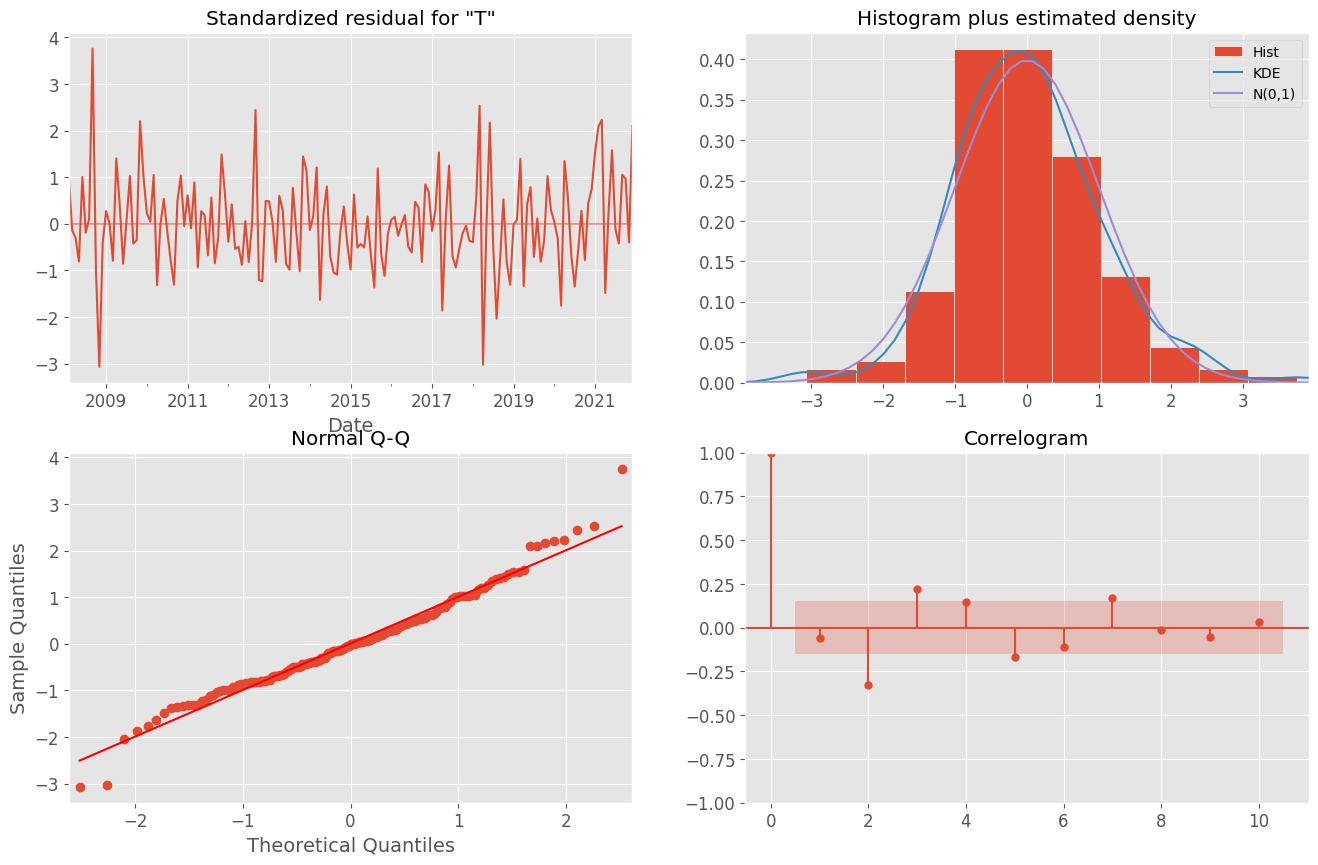

In [ ]:
results.plot_diagnostics()
plt.show()

# **Evaluation of Forecasts**

In odrer to understand the accuracy of our forecasts, we compare predicted number of accident to real number of accidents of the time series, and we set forecasts to start at **2017–01–01** to the end of the data.

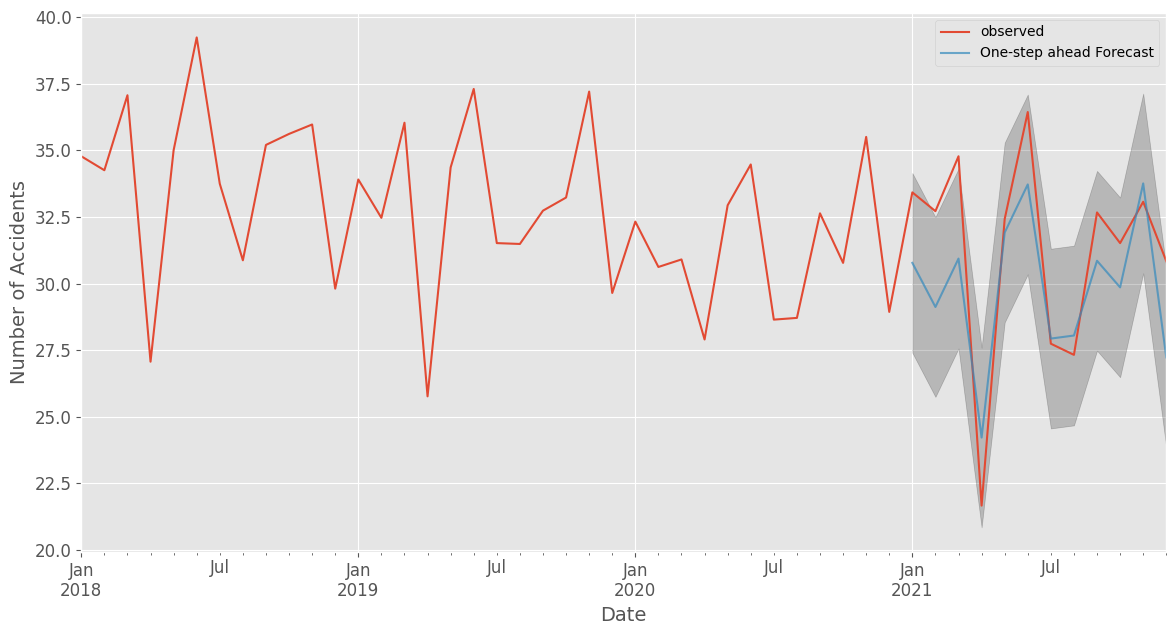

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
plt.legend()
plt.show()

Let's find out the **MSE** to see the **accuracy** of our model. The mean squared error (MSE) is largely used as a metric to determine the performance of an algorithm. In addition, MSE is the average of the square of the difference between the observed and predicted values of a variable.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5.74


# **Visualizing Forecasts**

As we can see in the below graph the number of road accident in Dhaka will decline in the coming years

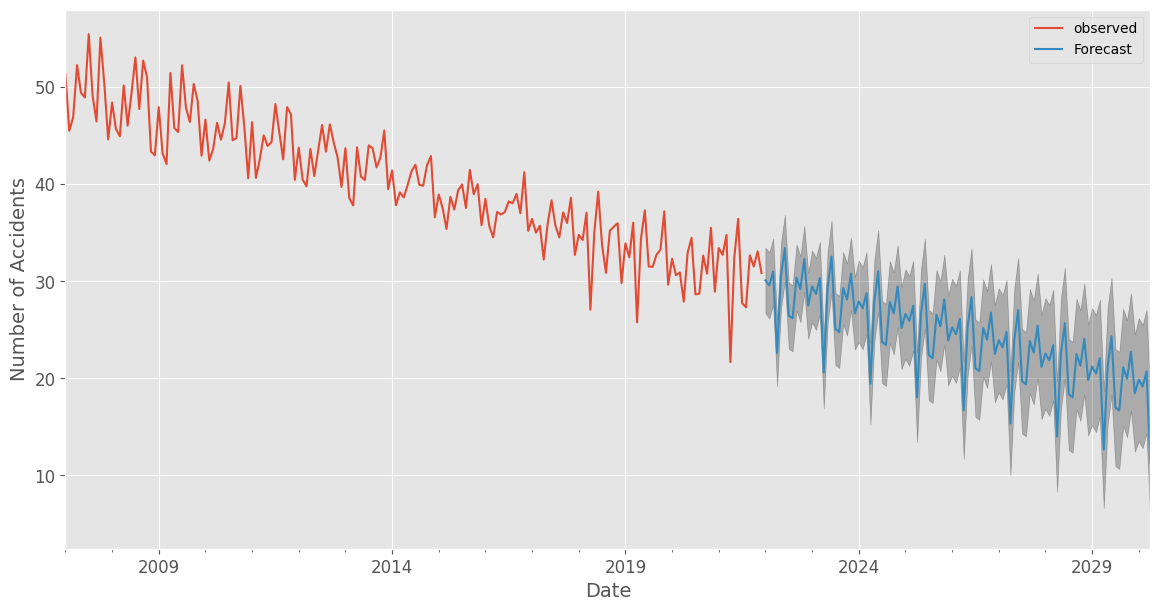

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Accidents')
plt.legend()
plt.show()

# **What is Prophet ?**

Prophet is an open source Time Series Forecasting Algorithm from Facebook and it designed for ease of use without expert knowledge on Time Series Forecasting or Statistics. Time Series Forecasting builds model by finding a best smooth line which can be represented as sum of the following component:
* Overal Growth Trend
* Early Seasonality
* Weekly Seasonality
* Holiday Affects

Benefit of Prophet Approach:
* Uneven time interval between data is not a problem
* Day with NA is not a problem
* Seasonality with multiple periods (Week & Year) is handled by default
* Works well by default setting, parameters are easily interpretable

**Sort the values by Date**

In [ ]:
df = df.sort_values(by=['Date'])
df.head()

,Date,Total_Accident
0,2007-01-01,29
31,2007-01-02,47
59,2007-01-03,32
90,2007-01-04,60
120,2007-01-05,80


Prophet requires the variable names in the time series to be:
* y – Target
* ds – Datetime

So, the next step is to convert the dataframe according to the above specifications

In [ ]:
df = df.rename(columns={'Date': 'ds', 'Total_Accident': 'y'})
df.head()

,ds,y
0,2007-01-01,29
31,2007-01-02,47
59,2007-01-03,32
90,2007-01-04,60
120,2007-01-05,80


# **Visualize the number of Road Accident for Each Day**

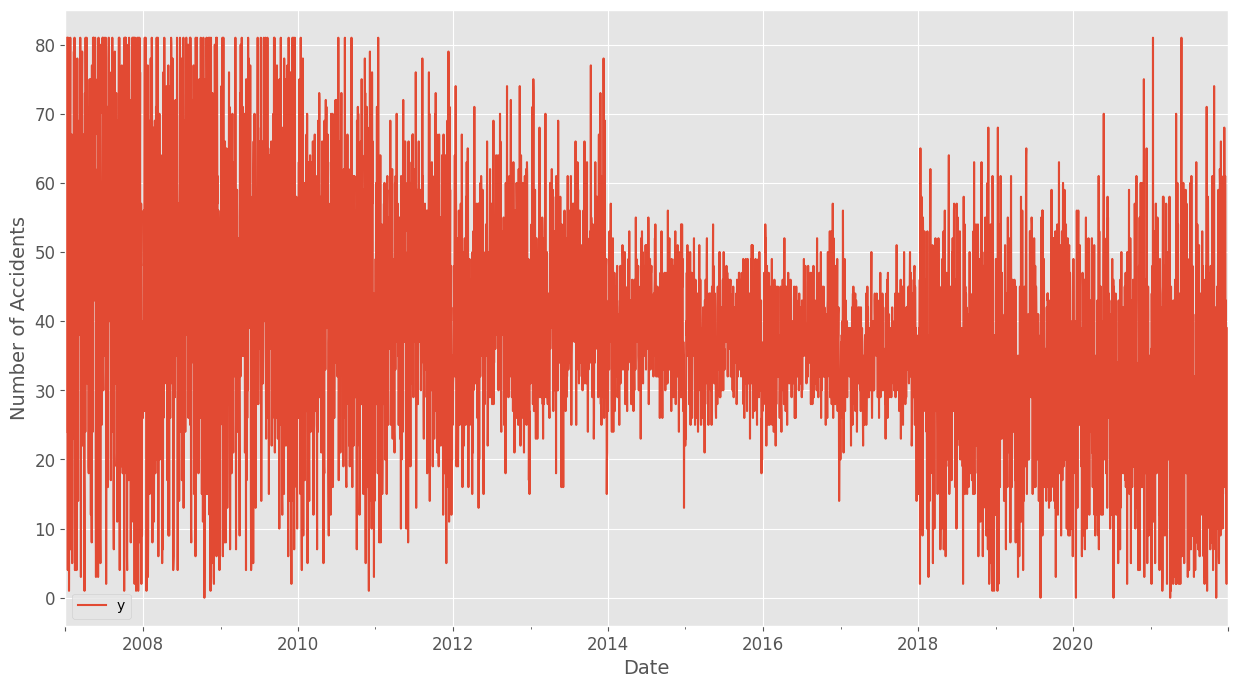

In [ ]:
ax = df.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Date')

plt.show()

# **Fitting the Prophet model**

Set the **uncertainty interval** to 95% (the Prophet default is 80%)

In [ ]:
from prophet import Prophet
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfdgceqy/jkm_r601.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfdgceqy/anyv_ge3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59938', 'data', 'file=/tmp/tmpbfdgceqy/jkm_r601.json', 'init=/tmp/tmpbfdgceqy/anyv_ge3.json', 'output', 'file=/tmp/tmpbfdgceqy/prophet_model6b36hxaf/prophet_model-20230605132530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


To create a forecast with our model we need to create some futue dates. Prophet provides us with a helper function called **make_future_dataframe**. We pass in the number of future periods and frequency. Above we created a forecast for the **next 120 months or 10 years**.

In [ ]:
future_dates = my_model.make_future_dataframe(periods=84, freq='MS')
future_dates.tail()

,ds
5558,2028-08-01
5559,2028-09-01
5560,2028-10-01
5561,2028-11-01
5562,2028-12-01


As we can see in the below table. **yhat** is our forcasted value

In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5558,2028-08-01,22.800731,-5.915859,51.545355
5559,2028-09-01,17.981991,-8.798703,49.549584
5560,2028-10-01,23.035698,-8.107310,51.645650
5561,2028-11-01,22.733294,-3.412165,51.814416
5562,2028-12-01,22.121851,-4.426770,49.422502


# **Visualizing Forecasts**

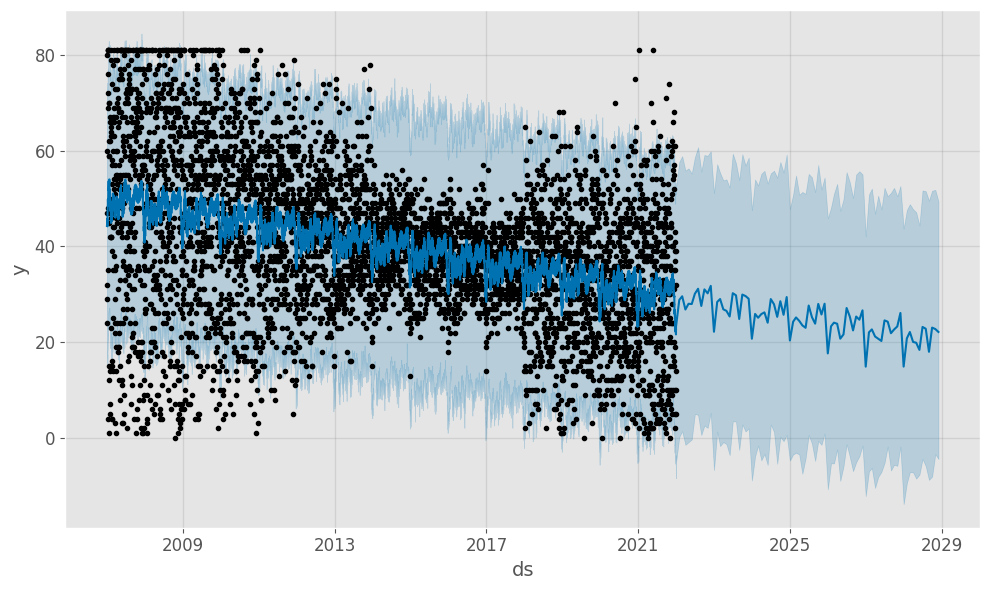

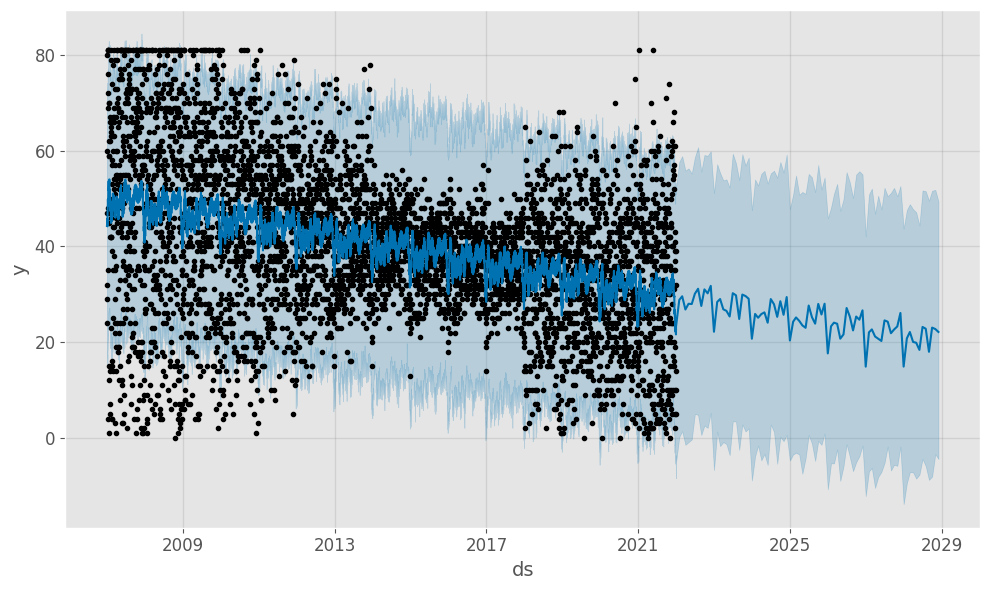

In [ ]:
pd.plotting.register_matplotlib_converters()
my_model.plot(forecast, uncertainty=True)

**plot_components** provides us a graph of our trend and seasonality

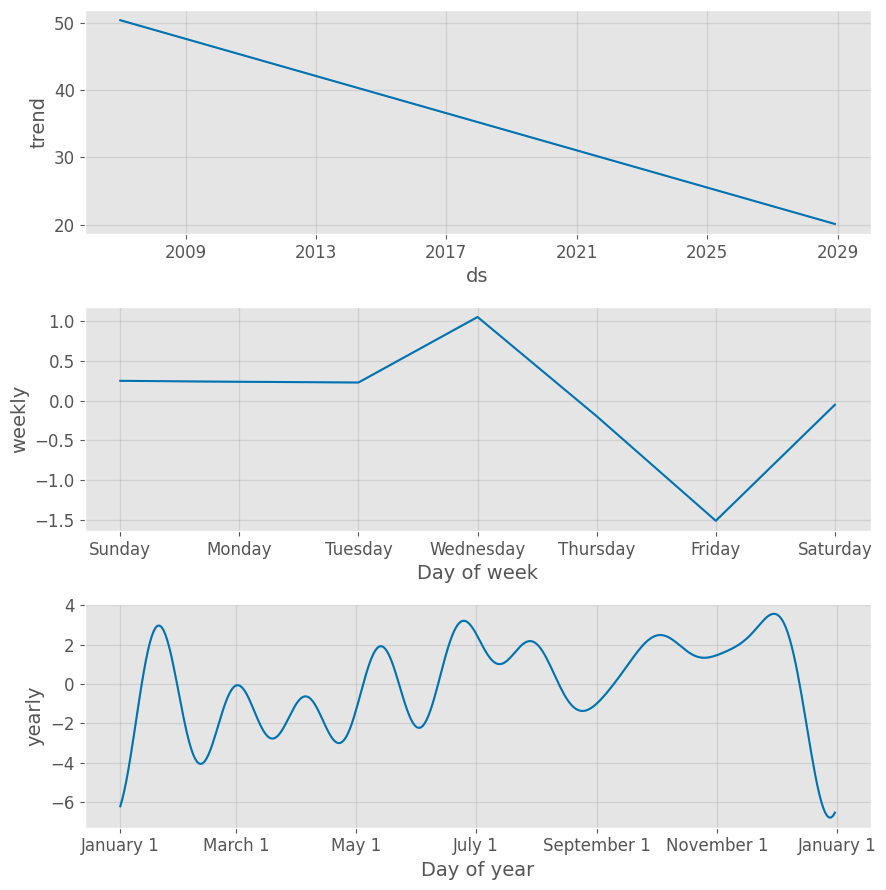

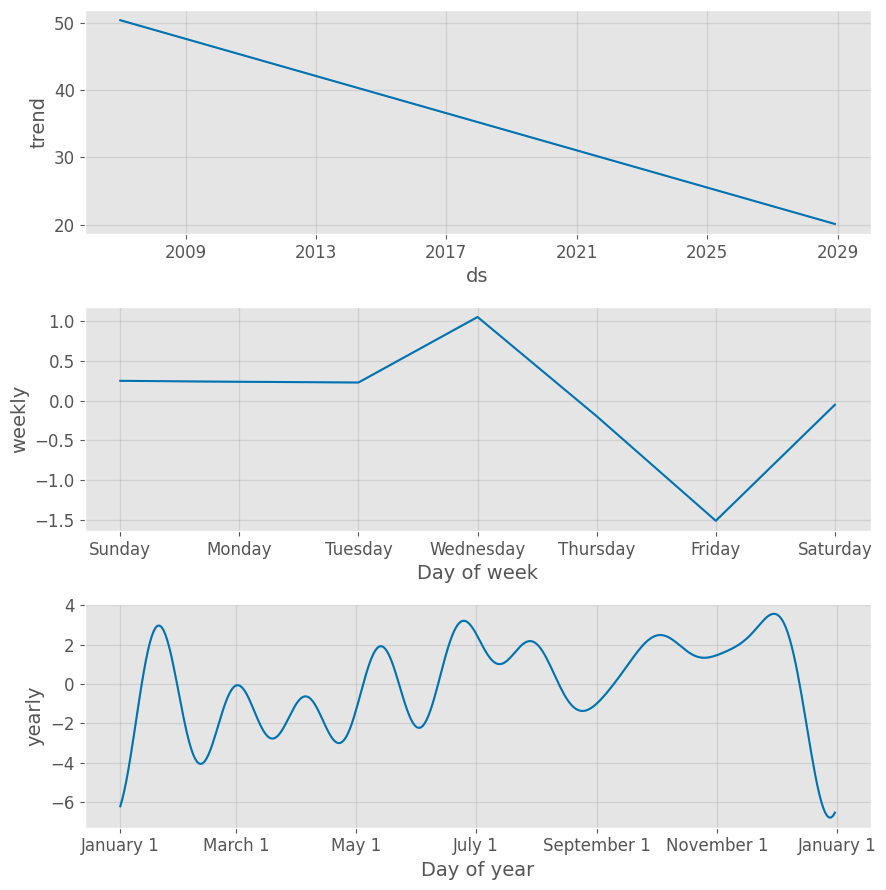

In [ ]:
my_model.plot_components(forecast)

# **Evaluation of Forecasts**

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 25 forecasts with cutoffs between 2009-03-04 00:00:00 and 2020-12-31 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfdgceqy/q3k_5h5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfdgceqy/gfxqkvgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91976', 'data', 'file=/tmp/tmpbfdgceqy/q3k_5h5a.json', 'init=/tmp/tmpbfdgceqy/gfxqkvgb.json', 'output', 'file=/tmp/tmpbfdgceqy/prophet_modelehzq1i42/prophet_model-20230605132624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:26:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:26:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfdgceqy/7b9rvgp4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbfdgceqy/qvewfkvf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-03-05,44.237153,3.752065,81.050321,32,2009-03-04
1,2009-03-06,27.453771,-10.636216,66.479936,56,2009-03-04
2,2009-03-07,35.861105,-0.946052,73.432147,63,2009-03-04
3,2009-03-08,45.248973,4.902177,84.624325,41,2009-03-04
4,2009-03-09,49.041509,9.588686,85.612105,50,2009-03-04


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,163.961971,12.804764,9.666388,0.194465,0.266839,0.985219
1,38 days,164.437708,12.823327,9.664534,0.191405,0.266652,0.984649
2,39 days,164.033067,12.807539,9.663285,0.192489,0.267538,0.984649
3,40 days,165.204691,12.853198,9.693090,0.190383,0.268712,0.984123
4,41 days,163.617412,12.791302,9.625269,0.187168,0.266139,0.984649
